# COGS 108 - EDA Checkpoint

# Names

- David Em-Yinn
- Jing Li
- Anna Hsieh
- Alejandro Garcia Martinez
- Christian Gonzalez

<a id='research_question'></a>
# Research Question

*Is there a relationship between stimulus checks and covid infection rates across the counties of California between March 2020 to February 2021?*

# Setup

In [2]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

### Data Set 1: Covid Rates by County
---

We first checked the unique values in the area column to find that it also included California, out of state, and unknown, so we removed those columns. Then we added a new column for the positivity rate by calculating it from the number of positive tests and the number of total tests. We only need the daily rates by county, so we selected the columns 'date', 'area', and 'rate' and renamed 'area' to 'county'. Lastly, we filtered the data to only include data from March 2020 to February 2021. 

In [11]:
covid_df = pd.read_csv('https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv')
covid_df = covid_df[~covid_df.area.isin(['California', 'Out of state', 'Unknown'])]
covid_df = covid_df.assign(rate = covid_df['positive_tests'] / covid_df['total_tests'] * 100)
covid_df = covid_df[['date', 'area', 'rate']]
covid_df = covid_df.rename({'area':'county'}, axis='columns')
covid_df = covid_df.loc[(covid_df['date'] >= '2020-03-01') & (covid_df['date'] <= '2021-02-27')]
covid_df.head()

,date,county,rate
29,2020-03-01,Alameda,0.000000
30,2020-03-02,Alameda,0.000000
31,2020-03-03,Alameda,0.000000
32,2020-03-04,Alameda,4.545455
33,2020-03-05,Alameda,0.000000


### Data Set 2: Stimulus Check Amounts
---

In order to create the data for the stimulus check, we were able to find all the data needed online [Stimulus Check 1 Source](https://www.irs.gov/pub/irs-utl/e-poster_payments.pdf) and [Stimulus Check 2 Source](https://www.irs.gov/newsroom/treasury-and-irs-begin-delivering-second-round-of-economic-impact-payments-to-millions-of-americans). We created a data frame that has two rows for the two stimulus checks we will be comparing. 

In the columns, we included the range of the disbursement dates, the base amount, amount given to a married couple, additional amount, and a the amounts that were given to families depending on how many qualified dependents or children they have in the form of tuples (x, y) where x represents a single parent family and y is a married couple family. 

The purpose of this data is for the reader to be able to see what the stimulus checks are, and how much was given to families. 

In [13]:
stimulus_data = {
    'range of disbursement': ['April 2020 - June 2020', 'December 2020 - January 2021'],
    'base': [1200, 600],
    'married couple': [2400, 1200],
    'amount per additional dependent': [500, 600],
    'one dependent': [(1700, 2900), (1200, 1800)],
    'two dependents': [(2200, 3400), (1800, 2400)],
    'three dependents': [(2700, 3900), (2400, 3000)],
    'four dependents': [(3200, 4400), (3000, 3600)],
    'five dependents': [(3700, 4900), (3600, 4200)],
    'six dependents': [(4200, 5400), (4200, 4800)]
}
stimulus_df = pd.DataFrame(stimulus_data, index = ['Stimulus Check 1', 'Stimulus Check 2'])
stimulus_df.head()

,range of disbursement,base,married couple,amount per additional dependent,one dependent,two dependents,three dependents,four dependents,five dependents,six dependents
Stimulus Check 1,April 2020 - June 2020,1200,2400,500,"(1700, 2900)","(2200, 3400)","(2700, 3900)","(3200, 4400)","(3700, 4900)","(4200, 5400)"
Stimulus Check 2,December 2020 - January 2021,600,1200,600,"(1200, 1800)","(1800, 2400)","(2400, 3000)","(3000, 3600)","(3600, 4200)","(4200, 4800)"


# Data Analysis & Results (EDA)

### EDA for the first stimulus check
---

Carry out EDA on your dataset(s); Describe in this section

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
covid_df_subset = covid_df[(covid_df['county'] == 'Los Angeles') | 
                           (covid_df['county'] == 'San Diego') | 
                           (covid_df['county'] == 'Orange') | 
                           (covid_df['county'] == 'Riverside') | 
                           (covid_df['county'] == 'San Bernardino') | 
                           (covid_df['county'] == 'Alameda') | 
                           (covid_df['county'] == 'Sacramento') | 
                           (covid_df['county'] == 'Santa Clara') |
                           (covid_df['county'] == 'Contra Costa') | 
                           (covid_df['county'] == 'Fresno')]
covid_df_stim1 = covid_df[((covid_df['county'] == 'Los Angeles') | 
                           (covid_df['county'] == 'San Diego') | 
                           (covid_df['county'] == 'Orange') | 
                           (covid_df['county'] == 'Riverside') | 
                           (covid_df['county'] == 'San Bernardino') | 
                           (covid_df['county'] == 'Alameda') | 
                           (covid_df['county'] == 'Sacramento') | 
                           (covid_df['county'] == 'Santa Clara') |
                           (covid_df['county'] == 'Contra Costa') | 
                           (covid_df['county'] == 'Fresno'))  & 
                           (covid_df['date'] <= '2020-08-29')]
covid_df_stim2 = covid_df[((covid_df['county'] == 'Los Angeles') | 
                           (covid_df['county'] == 'San Diego') | 
                           (covid_df['county'] == 'Orange') | 
                           (covid_df['county'] == 'Riverside') | 
                           (covid_df['county'] == 'San Bernardino') | 
                           (covid_df['county'] == 'Alameda') | 
                           (covid_df['county'] == 'Sacramento') | 
                           (covid_df['county'] == 'Santa Clara') |
                           (covid_df['county'] == 'Contra Costa') | 
                           (covid_df['county'] == 'Fresno'))  & 
                           (covid_df['date'] > '2020-08-29')]

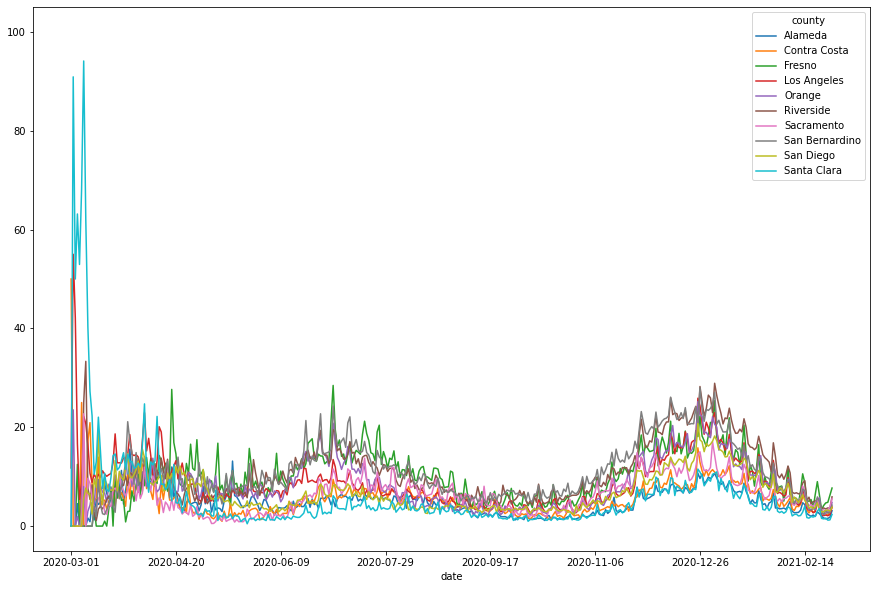

In [5]:
ax = covid_df_subset.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))

<AxesSubplot:xlabel='date'>

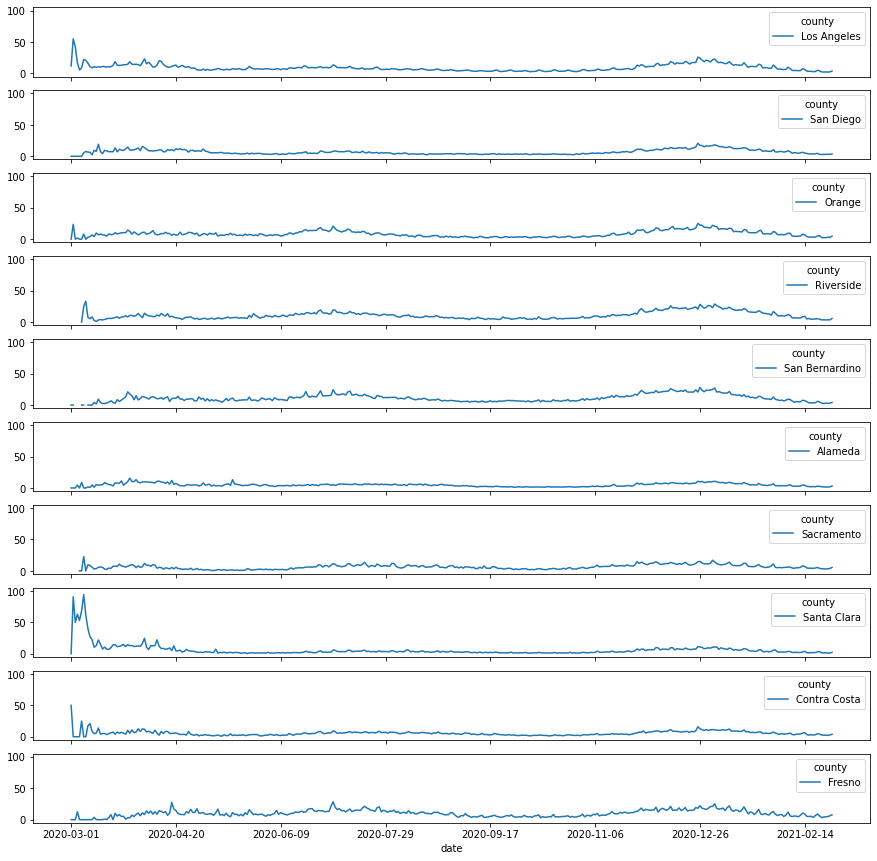

In [6]:
la1 = covid_df_stim1[(covid_df_stim1['county'] == 'Los Angeles')]
la2 = covid_df_stim2[(covid_df_stim2['county'] == 'Los Angeles')]
la = covid_df[(covid_df['county'] == 'Los Angeles')]

sd1 = covid_df_stim1[(covid_df_stim1['county'] == 'San Diego')]
sd2 = covid_df_stim2[(covid_df_stim2['county'] == 'San Diego')]
sd = covid_df[(covid_df['county'] == 'San Diego')]

orange1= covid_df_stim1[(covid_df_stim1['county'] == 'Orange')]
orange2 = covid_df_stim2[(covid_df_stim2['county'] == 'Orange')]
orange = covid_df[(covid_df['county'] == 'Orange')]

riverside1 = covid_df_stim1[(covid_df_stim1['county'] == 'Riverside')]
riverside2 = covid_df_stim2[(covid_df_stim2['county'] == 'Riverside')]
riverside = covid_df[(covid_df['county'] == 'Riverside')]

sb1 = covid_df_stim1[(covid_df_stim1['county'] == 'San Bernardino')]
sb2 = covid_df_stim2[(covid_df_stim2['county'] == 'San Bernardino')]
sb = covid_df[(covid_df['county'] == 'San Bernardino')]

alameda1 = covid_df_stim1[(covid_df_stim1['county'] == 'Alameda')]
alameda2 = covid_df_stim2[(covid_df_stim2['county'] == 'Alameda')]
alameda = covid_df[(covid_df['county'] == 'Alameda')]

sac1 = covid_df_stim1[(covid_df_stim1['county'] == 'Sacramento')]
sac2 = covid_df_stim2[(covid_df_stim2['county'] == 'Sacramento')]
sac = covid_df[(covid_df['county'] == 'Sacramento')]

sc1 = covid_df_stim1[(covid_df_stim1['county'] == 'Santa Clara')]
sc2 = covid_df_stim2[(covid_df_stim2['county'] == 'Santa Clara')]
sc = covid_df[(covid_df['county'] == 'Santa Clara')]

cc1 = covid_df_stim1[(covid_df_stim1['county'] == 'Contra Costa')]
cc2 = covid_df_stim2[(covid_df_stim2['county'] == 'Contra Costa')]
cc = covid_df[(covid_df['county'] == 'Contra Costa')]

fresno1 = covid_df_stim1[(covid_df_stim1['county'] == 'Fresno')]
fresno2 = covid_df_stim2[(covid_df_stim2['county'] == 'Fresno')]
fresno = covid_df[(covid_df['county'] == 'Fresno')]

fig, axes = plt.subplots(ncols = 1, nrows = 10, sharey = True, sharex = True)
la.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[0])
sd.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[1])
orange.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[2])
riverside.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[3])
sb.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[4])
alameda.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[5])
sac.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[6])
sc.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[7])
cc.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[8])
fresno.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 15), ax=axes[9])

[Text(-25.0, 0, '2020-08-05'),
 Text(0.0, 0, '2020-03-01'),
 Text(25.0, 0, '2020-03-26'),
 Text(50.0, 0, '2020-04-20'),
 Text(75.0, 0, '2020-05-15'),
 Text(100.0, 0, '2020-06-09'),
 Text(125.0, 0, '2020-07-04'),
 Text(150.0, 0, '2020-07-29'),
 Text(175.0, 0, '2020-08-23'),
 Text(200.0, 0, '')]

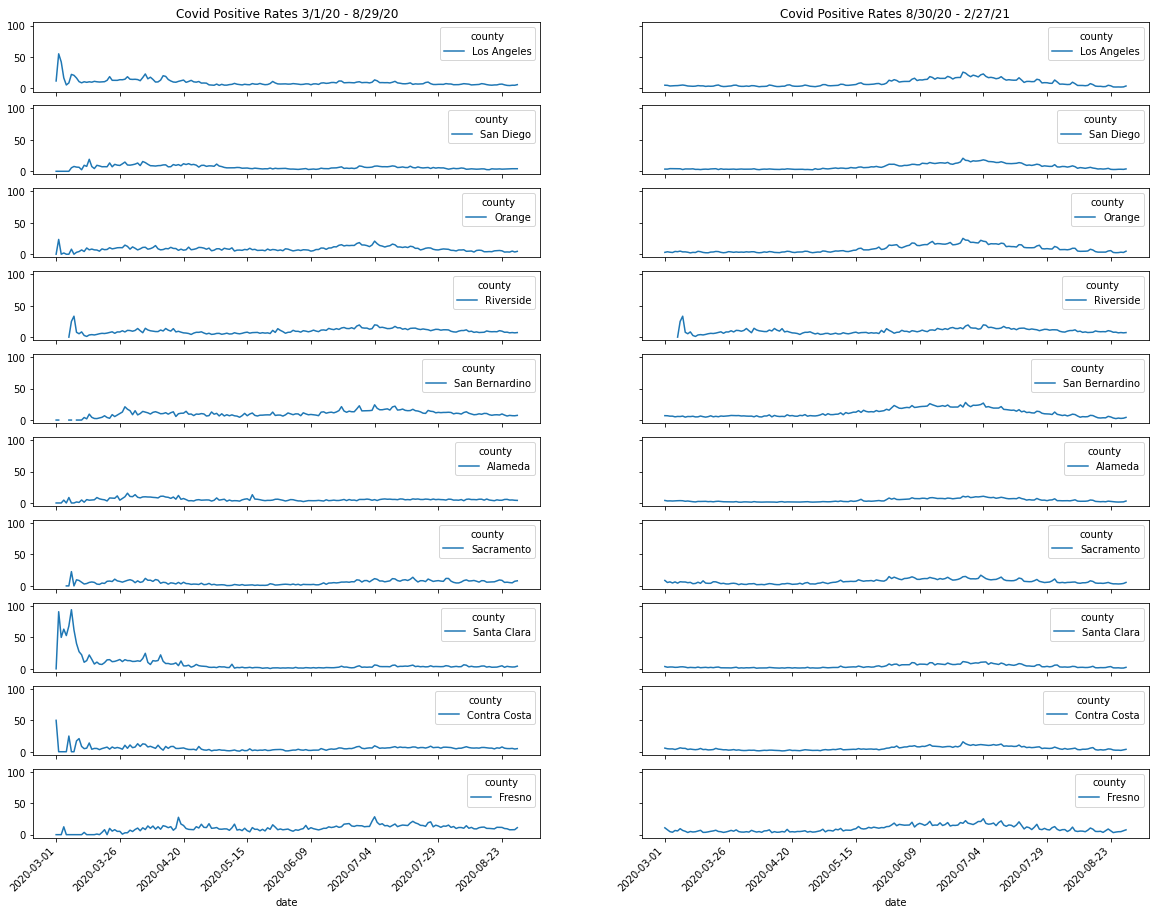

In [7]:
fig, axes = plt.subplots(ncols = 2, nrows = 10, sharey = True, sharex = True, figsize=(30,15))
axes[0,0].set_title('Covid Positive Rates 3/1/20 - 8/29/20')
axes[0,1].set_title('Covid Positive Rates 8/30/20 - 2/27/21')
la1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[0,0])
la2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[0,1])

sd1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[1,0])
sd2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[1,1])

orange1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[2,0])
orange2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[2,1])

riverside1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[3,0])
riverside1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[3,1])

sb1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[4,0])
sb2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[4,1])

alameda1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[5,0])
alameda2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[5,1])

sac1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[6,0])
sac2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[6,1])

sc1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[7,0])
sc2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[7,1])

cc1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[8,0])
cc2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[8,1])

fresno1.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[9,0])
fresno2.pivot(index="date", columns="county", values="rate").plot(figsize=(20, 15), ax=axes[9,1])

axes[9,1].set_xticklabels(axes[9,1].get_xticklabels(), rotation=45, ha='right')
axes[9,0].set_xticklabels(axes[9,0].get_xticklabels(), rotation=45, ha='right')

(0.0, 100.0)

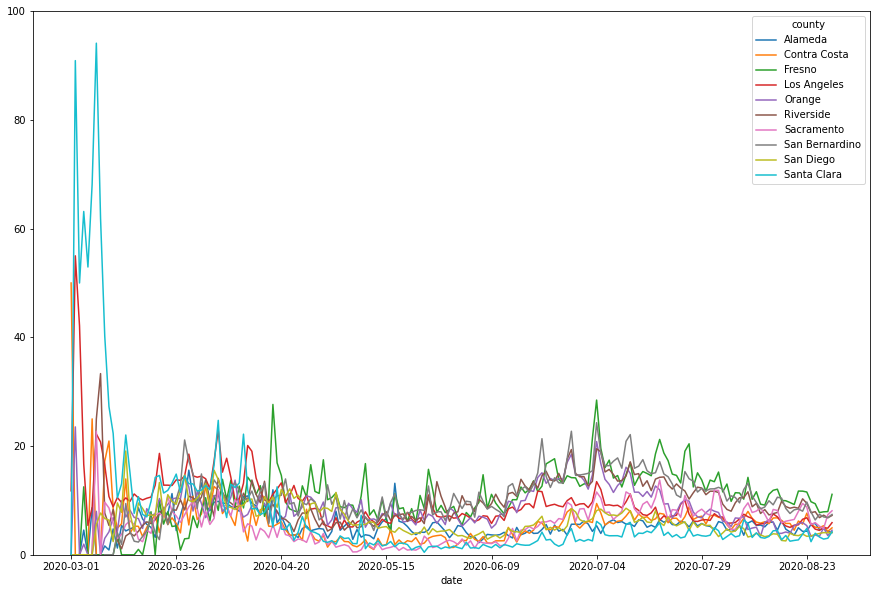

In [8]:
ax = covid_df_stim1.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))
plt.ylim(0, 100)

(0.0, 100.0)

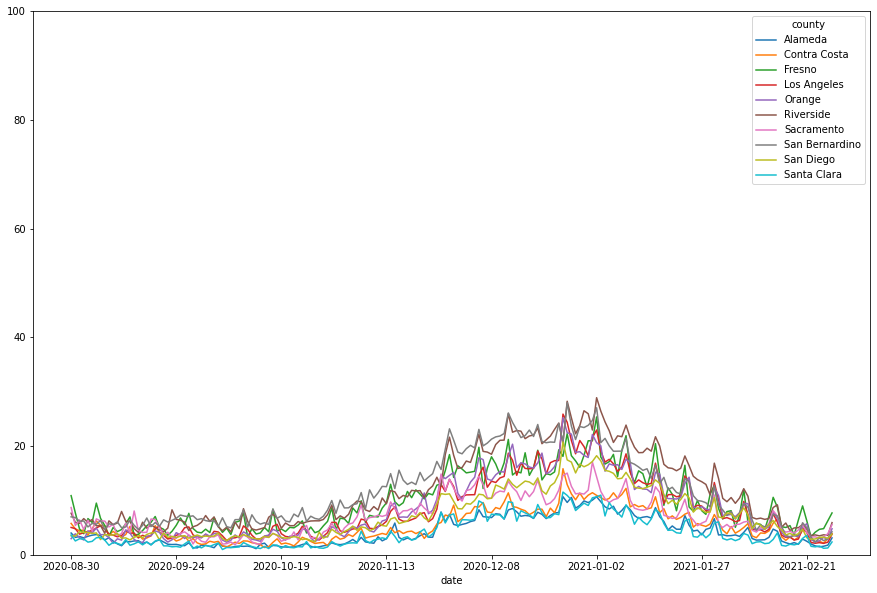

In [9]:
ax = covid_df_stim2.pivot(index="date", columns="county", values="rate").plot(figsize=(15, 10))
plt.ylim(0, 100)